# Project: Titanic Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we'll be analyzing data associated with the tragic event of the sinking of Titanic. In particular, we'll be interested in finding trends among the passengers who survived, and how they differed from the passengers who did not survive.

In [78]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [79]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
df.shape

(891, 12)

In [81]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Performing Data Cleaning and Analysis
#### 1. Understanding meaning of each column:
<br>Data Dictionary:
<br>**Variable        Description**</br>
1. Survived	- Survived (1) or died (0)
2. Pclass -	Passenger’s class (1 = 1st, 2 = 2nd, 3 = 3rd)
3. Name	- Passenger’s name
4. Sex -	Passenger’s sex
5. Age	- Passenger’s age
6. SibSp -	Number of siblings/spouses aboard
7. Parch -	Number of parents/children aboard (Some children travelled only with a nanny, therefore parch=0 for them.)
8. Ticket -	Ticket number
9. Fare -	Fare
10. Cabin -	Cabin
11. Embarked -	Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

#### 2. Analysing which columns are completely useless in predicting the survival and deleting them
**Note** - Don't just delete the columns because you are not finding it useful. Or focus is not on deleting the columns. Our focus is on analysing how each column is affecting the result or the prediction and in accordance with that deciding whether to keep the column or to delete the column or fill the null values of the column by some values and if yes, then what values.

In [83]:
# Name column can never decide survival of a person, hence we can safely delete it
# Better to display the entire dataframe after a deletion of a column to get a better view
# Similarly PassengerId, Ticket and Cabin can not decide the survival of a person
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [84]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


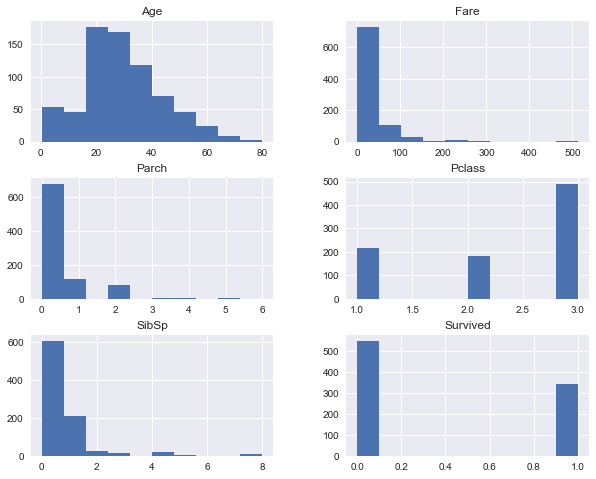

In [86]:
# Viewing the histogram of the whole data frame
sns.set()
df.hist(figsize=(10, 8));

The histogram for the whole data frame agrees with what we saw in the summary statistics using the df.describe() function. The majority of passengers did not pay higher fare (histogram for Fare is very skewed to the right) and most people are in the third-class. More people didn't survived than the ones who survived. And most people didn't come with parents, children, siblings or spouses. Age is also skewed to the right with the majority between 20 and 40.

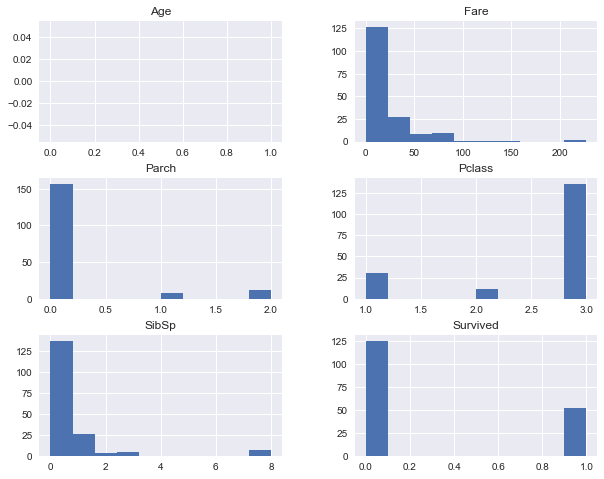

In [87]:
# Checking that results with this dataframe are not super off from general (i.e. rest of the data: whole data frame)
df[df.Age.isnull()].hist(figsize=(10, 8));

In [88]:
# Filling the missing values with the mean
df.fillna(df.mean(), inplace=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


The missing values in the "Age" column were filled by the mean age value but the missing values in the "Embarked" column weren't filled up because this is not numeric data.

In [90]:
# There are only two missing values in the "Embarked" column and the rows with those missing values are as below.
df[df.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [91]:
# Since we have only 2 missing values in 2 rows, we can drop them.
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


This completes the data cleaning process.

<a id='eda'></a>
## Exploratory Data Analysis
"Survived" is the dependent variable and rest of the variables are independent variables. Let's explore all the associations between the dependent and independent variables one at a time.

#### Question 1
Whether the fare is associated with the survival?

So, to make it easier to grab these rows easily in the future as well, I'm going to create masks for rows where the passengers survived and rows where they did not.

In [92]:
survived = df.Survived == True

In [93]:
survived

0      False
1       True
2       True
3       True
4      False
5      False
6      False
7      False
8       True
9       True
10      True
11      True
12     False
13     False
14     False
15      True
16     False
17      True
18     False
19      True
20     False
21      True
22      True
23      True
24     False
25      True
26     False
27     False
28      True
29     False
       ...  
861    False
862     True
863    False
864    False
865     True
866     True
867    False
868    False
869     True
870    False
871     True
872    False
873    False
874     True
875     True
876    False
877    False
878    False
879     True
880     True
881    False
882    False
883    False
884    False
885    False
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 889, dtype: bool

In [94]:
died = df.Survived == False

In [95]:
died

0       True
1      False
2      False
3      False
4       True
5       True
6       True
7       True
8      False
9      False
10     False
11     False
12      True
13      True
14      True
15     False
16      True
17     False
18      True
19     False
20      True
21     False
22     False
23     False
24      True
25     False
26      True
27      True
28     False
29      True
       ...  
861     True
862    False
863     True
864     True
865    False
866    False
867     True
868     True
869    False
870     True
871    False
872     True
873     True
874    False
875    False
876     True
877     True
878     True
879    False
880    False
881     True
882     True
883     True
884     True
885     True
886     True
887    False
888     True
889    False
890     True
Name: Survived, Length: 889, dtype: bool

Let's get the mean fares of passengers who survived and those who didn't

In [96]:
df.Fare[survived].mean()

48.209498235294106

In [97]:
df.Fare[died].mean()

22.117886885245877

It does look like the people who survived had a much higher fare than the people who did not. But, we can see this more clearly if we look at the distribution of fares and then compare them in a visual.

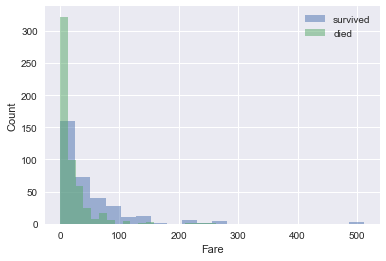

In [98]:
df.Fare[survived].hist(label='survived', bins=20, alpha=0.5)
df.Fare[died].hist(label='died', bins=20, alpha=0.5)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend();

Looking at the visual we can conclude that people who survived, generally had higher fares than the people who did not.

But fare also seems like it would be more closely correlated with class. So let's take a look at that as well.

#### Question 2
Is survival of a passenger dependent on the class?

In [99]:
df.groupby('Pclass').Survived.mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

It definitely look like higher the class, the more likely you are to survive. Let's look at the visual.

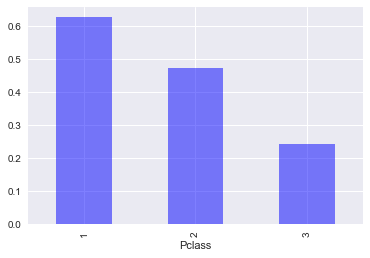

In [100]:
df.groupby('Pclass').Survived.mean().plot(kind='bar', color='blue', alpha=0.5);

The visual clearly demonstrates the fact that higher the class, better are the chances of survival.

Similarly, let's compare the distribution of ages for the passengers who survived and didn't survive.

#### Question 3
Is survival of a passenger dependent on age?

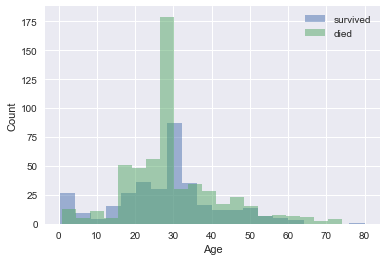

In [101]:
df.Age[survived].hist(label='survived', bins=20, alpha=0.5)
df.Age[died].hist(label='died', bins=20, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend();

So based on this plot, it looks like really young children have a higher chance of surviving than other ages, but other than that it doesn't look like they are too correlated.

#### Question 4
Is survival of an individual dependent on their gender?

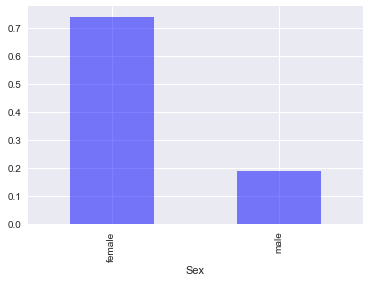

In [102]:
df.groupby('Sex').Survived.mean().plot(kind='bar', color='blue', alpha=0.5);

It does look there are more females surviving than men, but just to make sure that this isn't due to some other weird reason like there are very few females and they just happened to be in the first-class or something, so let's check the counts of males and females.

In [103]:
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [104]:
df.query('Sex == "female"')['Fare'].median(), df.query('Sex == "male"')['Fare'].median()

(23.0, 10.5)

Looks like women have spent more for a better class, but let's check this visually.

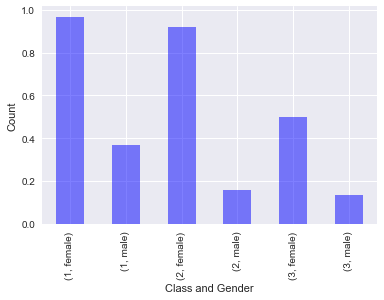

In [105]:
df.groupby(['Pclass', 'Sex']).Survived.mean().plot(kind='bar', color='blue', alpha=0.5)
plt.xlabel('Class and Gender')
plt.ylabel('Count');

Even if we seperate the passengers by class, we find that women are surviving more than men. So, there does seem to be a pretty strong association between gender and survival.

#### Question 5
How having family on board is associated with survival?

We can analyze this using the columns for siblings and spouses, as well as the one for parents and children.

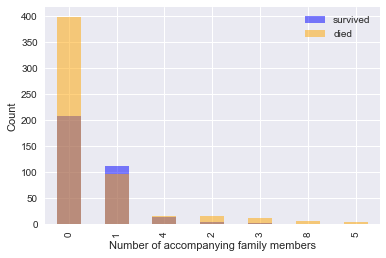

In [106]:
df.SibSp[survived].value_counts().plot(kind='bar', label='survived', color='blue', alpha=0.5)
df.SibSp[died].value_counts().plot(kind='bar', label='died', color='orange', alpha=0.5)
plt.xlabel('Number of accompanying family members')
plt.ylabel('Count')
plt.legend();

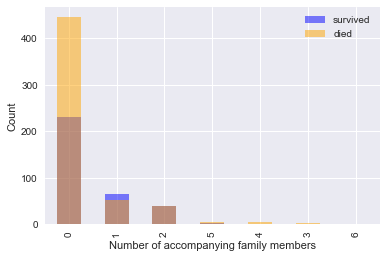

In [107]:
df.Parch[survived].value_counts().plot(kind='bar', label='survived', color='blue', alpha=0.5)
df.Parch[died].value_counts().plot(kind='bar', label='died', color='orange', alpha=0.5)
plt.xlabel('Number of accompanying family members')
plt.ylabel('Count')
plt.legend();

So, a lot of people who have more family members accompanying them don't appear to be surviving. People who have 1 family member accompanying them survived more a little bit and then majority of people who were alone did not survive (also, most of the poplulation appears to be in this category with no acompanying family members).

#### Question 6
How is the variable "Embarked" associated with survival i.e. whether embarking on the voyage from any of port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) have an impact on the survival of the passenger?

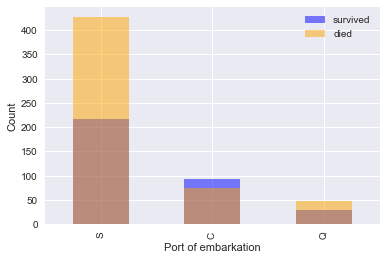

In [108]:
df.Embarked[survived].value_counts().plot(kind='bar', label='survived', color='blue', alpha=0.5)
df.Embarked[died].value_counts().plot(kind='bar', label='died', color='orange', alpha=0.5)
plt.xlabel('Port of embarkation')
plt.ylabel('Count')
plt.legend();

So, people in the 'S' category seemed to be not having as much luck, 'C' is a bit better, 'Q' is also not that great. So embark does seem to have some association with survival.

<a id='conclusions'></a>
## Conclusions
Basesd on the data analysis, we can conclude the following:
- People who survived, generally had higher fares than the people who did not.
- Higher the class, better are the chances of survival.
- Really young children have a higher chance of surviving than other ages, but other than that it (age and survival) doesn't look like they are too correlated.
- Women are surviving more than men. So, there does seem to be a pretty strong association between gender and survival.
- People with more accompanying family members survived less than others.
- Rate of survival is decreasing in the orders of ports of emarkment as C = Cherbourg > S = Southampton > Q = Queenstown.